# RUNNING CLOUDY WITHIN THE PYCLOUDY ENVIRONMENT

The proposed exercises use the Cloudy code within the pyCloudy environment, developed by C. Morisset, in which many tools are available to easily make models and analyze them. See the pyCloudy pages at: https://sites.google.com/site/pycloudy/

## Ionization and temperature structure

### Compare a spherical model with n = 100 cm$^{−3}$ and filling factor ff =1 with a model with n = 10$^4$ cm$^{−3}$ and filling factor ff =0.1.  Plot Te, O$^{++}$/O, O$^+$/O as a function of fractional radius in those two models. Repeat the exercise for various values of the effective temperature.

##### We import some usefull libraies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import matplotlib
matplotlib.rc('axes', linewidth=1.5)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('font', size=12)

In [2]:
print(pc.__version__)

0.9.2b2


##### We first tell pyCloudy where Cloudy is. Adapt the following to your installation.

In [3]:
pc.config.cloudy_exe = 'cloudy.exe'

##### We define a directory where we want the models to be. You may have to create it and give proper permissions.

In [4]:
models_dir = '../../Models/'

##### We create a Makefile in this directory that will be used to run the models. This needs to be done only once.

In [5]:
pc.print_make_file(models_dir)

##### We define a CloudyInput object filled with the parameters of the model we want to run

In [6]:
name = 'M6_1'

In [7]:
c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))

##### Look at the available methods in the CloudyInput object.

In [8]:
help(c_input)

Help on CloudyInput in module pyCloudy.c1d.cloudy_model object:

class CloudyInput(builtins.object)
 |  Object used to create and write input file for Cloudy code.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_name=None)
 |      - model_name : name of the model. Used to name the input file and all the output files.
 |      The other parameters of the model are set using the methods
 |  
 |  import_file(self, file_=None)
 |      Import a file that will be append to the input file.
 |  
 |  init_all(self)
 |  
 |  print_input(self, to_file=True, verbose=False)
 |      This is the method to print the input file.
 |      Parameters:
 |          - to_file: Boolean. If True (default), print to the file defined as model_name + '.in'
 |          - verbose: Boolean. If True (not default), print to the standart output
 |  
 |  print_make_file(self, dir_=None)
 |      Call pc.print_make_file. 
 |      Parameter:
 |          dir_:    if None, extract the string before the last / in 

##### Set some parameters.

In [9]:
c_input.set_BB(Teff = 50000., lumi_unit = 'q(H)', lumi_value = 48)
c_input.set_cste_density(2., ff = 1.)
c_input.set_radius(r_in = 15.)
c_input.set_abund(predef = 'ism')
c_input.set_distance(dist=1., unit='kpc', linear=True)
options = ('no molecules',
           'no level2 lines',
           'no fine opacities',
           'atom h-like levels small',
           'atom he-like levels small',
           'element limit off -7',
            )
c_input.set_other(options)
c_input.print_input()

In [10]:
!cat ../../Models/M6_1.in

////////////////////////////////////
title M6_1
////////////////////////////////////
set punch prefix "M6_1"
Blackbody 50000.000000
q(H) = 48.000
radius = 15.000
hden = 2.000
filling factor = 1.000000
abundances ism no grains
distance = 1000.0 parsecs linear
no molecules
no level2 lines
no fine opacities
atom h-like levels small
atom he-like levels small
element limit off -7
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


##### Run the model.

In [11]:
c_input.run_cloudy()

##### Read the model results into a CloudyModel object.

In [12]:
pc.log_.level=3
M1 = pc.CloudyModel('{0}/{1}'.format(models_dir, name))
# A warning is issued because no emission line file is found. 
# This is a normal behaviour, we didn't set it.

     CloudyModel ../../Models//M6_1: Creating CloudyModel for ../../Models//M6_1
     CloudyModel ../../Models//M6_1: Li abundance not defined
     CloudyModel ../../Models//M6_1: Be abundance not defined
     CloudyModel ../../Models//M6_1: B abundance not defined
     CloudyModel ../../Models//M6_1: F abundance not defined
     CloudyModel ../../Models//M6_1: Al abundance not defined
     CloudyModel ../../Models//M6_1: K abundance not defined
     CloudyModel ../../Models//M6_1: Ca abundance not defined
     CloudyModel ../../Models//M6_1: Sc abundance not defined
     CloudyModel ../../Models//M6_1: Ti abundance not defined
     CloudyModel ../../Models//M6_1: V abundance not defined
     CloudyModel ../../Models//M6_1: Cr abundance not defined
     CloudyModel ../../Models//M6_1: Mn abundance not defined
     CloudyModel ../../Models//M6_1: Co abundance not defined
     CloudyModel ../../Models//M6_1: Ni abundance not defined
     CloudyModel ../../Models//M6_1: Cu abundance not d

##### We plot some values depending on the radius of the nebula.

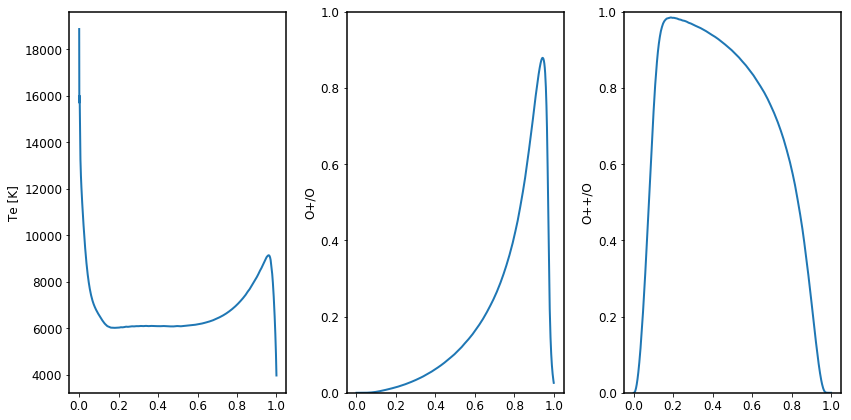

In [13]:
f, axes = plt.subplots(1, 3, figsize=(12,6))
x = M1.depth/np.max(M1.depth)
axes[0].plot(x, M1.te)
axes[0].set_ylabel('Te [K]')
axes[1].plot(x, M1.get_ionic('O', 1))
axes[1].set_ylabel('O+/O')
axes[1].set_ylim(0,1)
axes[2].plot(x, M1.get_ionic('O', 2))
axes[2].set_ylabel('O++/O')
axes[2].set_ylim(0,1)
f.tight_layout()

##### We prepare the inputs for a new model with different density.

In [14]:
name = 'M6_2'

In [ ]:
c_input.model_name = '{0}/{1}'.format(models_dir, name)
c_input.set_cste_density(4., ff = .1)
c_input.print_input()
c_input.run_cloudy()

In [15]:
M2 = pc.CloudyModel('{0}/{1}'.format(models_dir, name))

     CloudyModel ../../Models//M6_2: Creating CloudyModel for ../../Models//M6_2
     CloudyModel ../../Models//M6_2: Li abundance not defined
     CloudyModel ../../Models//M6_2: Be abundance not defined
     CloudyModel ../../Models//M6_2: B abundance not defined
     CloudyModel ../../Models//M6_2: F abundance not defined
     CloudyModel ../../Models//M6_2: Al abundance not defined
     CloudyModel ../../Models//M6_2: K abundance not defined
     CloudyModel ../../Models//M6_2: Ca abundance not defined
     CloudyModel ../../Models//M6_2: Sc abundance not defined
     CloudyModel ../../Models//M6_2: Ti abundance not defined
     CloudyModel ../../Models//M6_2: V abundance not defined
     CloudyModel ../../Models//M6_2: Cr abundance not defined
     CloudyModel ../../Models//M6_2: Mn abundance not defined
     CloudyModel ../../Models//M6_2: Co abundance not defined
     CloudyModel ../../Models//M6_2: Ni abundance not defined
     CloudyModel ../../Models//M6_2: Cu abundance not d

In [16]:
M1.print_stats()

 Name of the model: ../../Models//M6_1
 R_in (cut) = 1.000e+15 (1.000e+15), R_out (cut) = 4.005e+18 (4.005e+18)
 H+ mass = 2.07e+01, H mass = 2.26e+01
 <H+/H> = 0.97, <He++/He> = 0.00, <He+/He> = 0.97
 <O+++/O> = 0.00, <O++/O> = 0.57, <O+/O> = 0.40
 <N+++/O> = 0.01, <N++/O> = 0.64, <N+/O> = 0.33
 T(O+++) = 7081, T(O++) = 6583, T(O+) = 7752
 <ne> = 100,  <nH> = 100, T0 = 7109, t2=0.0200
 <log U> = -2.30


In [17]:
M2.print_stats()

 Name of the model: ../../Models//M6_2
 R_in (cut) = 1.000e+15 (1.000e+15), R_out (cut) = 4.220e+17 (4.220e+17)
 H+ mass = 2.39e-01, H mass = 2.65e-01
 <H+/H> = 0.97, <He++/He> = 0.00, <He+/He> = 0.97
 <O+++/O> = 0.00, <O++/O> = 0.57, <O+/O> = 0.40
 <N+++/O> = 0.01, <N++/O> = 0.64, <N+/O> = 0.34
 T(O+++) = 9831, T(O++) = 8091, T(O+) = 8860
 <ne> = 9938,  <nH> = 10000, T0 = 8424, t2=0.0066
 <log U> = -2.35


##### We plot the parameters for the 2 models.

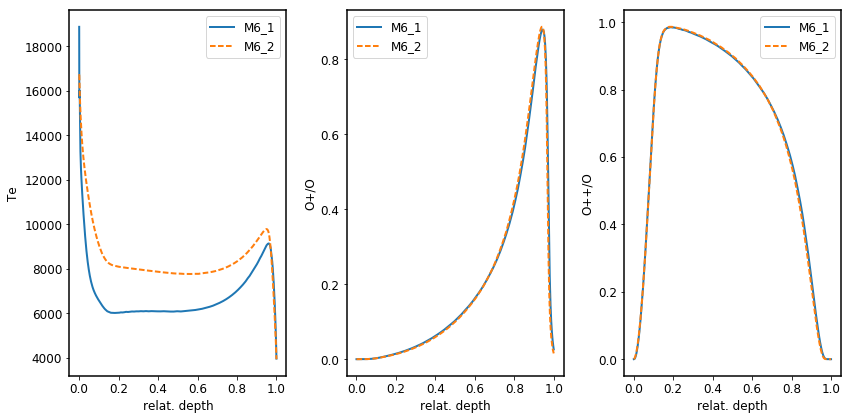

In [18]:
f, axes = plt.subplots(1, 3, figsize=(12,6))
axes[0].plot(M1.depth/np.max(M1.depth), M1.te, label='M6_1')
axes[0].plot(M2.depth/np.max(M2.depth), M2.te, '--', label='M6_2')
axes[1].plot(M1.depth/np.max(M1.depth), M1.get_ionic('O', 1), label='M6_1')
axes[2].plot(M1.depth/np.max(M1.depth), M1.get_ionic('O', 2), label='M6_1')
axes[1].plot(M2.depth/np.max(M2.depth), M2.get_ionic('O', 1), '--', label='M6_2')
axes[2].plot(M2.depth/np.max(M2.depth), M2.get_ionic('O', 2), '--', label='M6_2')
axes[0].set_ylabel('Te')     
axes[1].set_ylabel('O+/O')     
axes[2].set_ylabel('O++/O') 
axes[0].set_xlabel('relat. depth')
axes[1].set_xlabel('relat. depth')
axes[2].set_xlabel('relat. depth')
for ax in axes:
    ax.legend(loc='best')
f.tight_layout()

##### We define a function that writes and runs the input file. It depends on some parameters (namely the effective temeprature, the density and the filling factor).

In [19]:
def make_mod(name, Teff, dens, ff):
    options = ('no molecules',
           'no level2 lines',
           'no fine opacities',
           'atom h-like levels small',
           'atom he-like levels small',
           'element limit off -7',
            )
    c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))
    c_input.set_BB(Teff = Teff, lumi_unit = 'q(H)', lumi_value = 48)
    c_input.set_cste_density(dens, ff = ff)
    c_input.set_radius(r_in = 15.)
    c_input.set_abund(predef = 'ism')
    c_input.set_distance(dist=1., unit='kpc', linear=True)
    c_input.set_other(options)
    c_input.print_input()

##### We can now easily prepare 6 input files for 6 different models.

In [22]:
make_mod('M6_3', Teff=100000, dens=2, ff=1.)
make_mod('M6_4', Teff=100000, dens=4, ff=0.1)
make_mod('M6_5', Teff=150000, dens=2, ff=1.)
make_mod('M6_6', Teff=150000, dens=4, ff=0.1)

##### We check the number of processes of the computer.

In [23]:
pc.config.Nprocs

8

##### We will run the models using 8 processors of the computer.

In [24]:
pc.run_cloudy(models_dir, n_proc=8)

##### We read the results of the models in different CloudyModel objects.

In [25]:
pc.log_.level=2
M3 = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_3'), read_emis=False)
M4 = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_4'), read_emis=False)
M5 = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_5'), read_emis=False)
M6 = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_6'), read_emis=False)

##### We define a function used to plot the results of a model given as a parameter. The axis object is a parameter, to allow easy overplot.

In [26]:
def plot_mod(M, axes):
    axes[0].plot(M.depth/np.max(M.depth), M.te, 
            label='{}'.format(M.model_name.split('/')[-1]))
    axes[1].plot(M.depth/np.max(M.depth), M.get_ionic('O', 1), 
            label='{}'.format(M.model_name.split('/')[-1]))
    axes[2].plot(M.depth/np.max(M.depth), M.get_ionic('O', 2), '--', 
            label='{}'.format(M.model_name.split('/')[-1]))
    axes[0].set_ylabel('Te')     
    axes[1].set_ylabel('O+/O')     
    axes[2].set_ylabel('O++/O') 
    axes[0].set_xlabel('relat. depth')
    axes[1].set_xlabel('relat. depth')
    axes[2].set_xlabel('relat. depth')

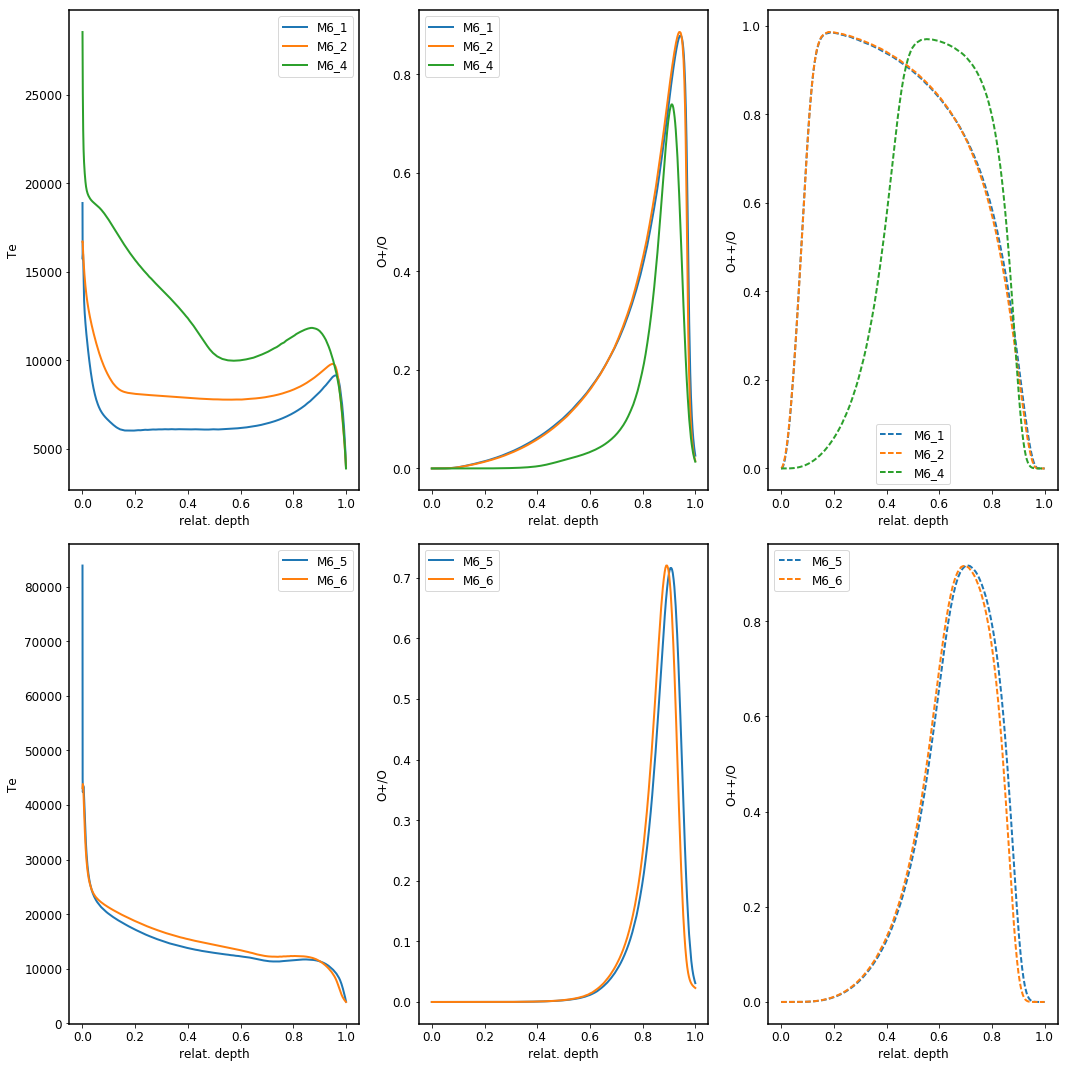

In [27]:
f, axes = plt.subplots(2, 3, figsize=(15,15))
plot_mod(M1, axes[0,:])
plot_mod(M2, axes[0,:])
plot_mod(M4, axes[0,:])

plot_mod(M5, axes[1,:])
plot_mod(M6, axes[1,:])

for ax in axes.ravel():
    ax.legend(loc='best', fancybox=True, framealpha=0.75)
f.tight_layout()

### ??? Comment on the results.

### Construct a series of constant density, spherical dust-free models of density n = 100 cm$^{−3}$ with average ionization parameter log U = −2 ionized by a star radiating as a blackbody at a temperature of 50000K, where the metallicity varies from 0.01 Z$_\odot$ to 3 Z$_\odot$. Plot the following parameters, as a function of metallicity: outer radius, average temperatures and ionic fractions of O$^+$ and O$^{++}$, [O II] $\lambda$ 3727/H$\beta$, [O III] $\lambda$ 5007/H$\beta$, [O III] $\lambda$ 88$\mu$m/H$\beta$.

##### We define some commands to speed-up Cloudy.

In [28]:
options = ('no molecules',
           'no level2 lines',
           'no fine opacities',
           'atom h-like levels small',
           'atom he-like levels small',
           'element limit off -7'
            )

##### We define a function that computes and returns the inner radius and the number of ionizing photons emitted by the source (Q0) needed to obtain a given mean logU, for a given geometry factor fr, hydrogen density NH and filling factor ff.

In [29]:
def get_R_in_Q0(logU, fr, NH=100, ff=1.0):
    """
    Return the inner radius and the Q0 for a given mean logU, fr, nH and ff
    Parameters:
        - logU : mean ionization parameter
        - fr = R_in / R_Str
        - 
    """
    c = pc.CST.CLIGHT
    U_mean = 10**logU
    w = (1 + fr**3.)**(1./3) - fr
    alpha_B = 2.6e-13
    Q0 = 4. * np.pi * c**3 * U_mean**3 / (3. * NH * ff**2 * alpha_B**2 * w**3)
    R_str = (3. * Q0 / (4 * np.pi * NH**2 * alpha_B * ff))**(1./3)
    R_in = fr * R_str
    return R_in, Q0

##### We import the Asplund (2009) abundances and the depletion factors used in Cloudy.

In [30]:
from pyCloudy.utils.physics import abund_Asplund_2009, depletion_cloudy_13
ab_O = abund_Asplund_2009['O']

##### We define a function that generate the Cloudy input file.

In [35]:
def make_mod2(name, delta_O, grains=False, depletion=False):
    NH = 100
    ff = 1.0
    R_in, Q0 = get_R_in_Q0(logU=-2, fr=0.03, NH=NH, ff=ff)
    abund = abund_Asplund_2009.copy()
    deplet = depletion_cloudy_13.copy()
    for elem in abund:
        if elem != 'He':
            abund[elem] += delta_O
        if depletion:
            abund[elem] += np.log10(deplet[elem])
    c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))
    c_input.set_BB(Teff = 50000., lumi_unit = 'q(H)', lumi_value = np.log10(Q0))
    c_input.set_cste_density(np.log10(NH), ff = ff)
    c_input.set_radius(r_in = np.log10(R_in))
    c_input.set_abund(ab_dict = abund)
    if grains:
        c_input.set_grains('Orion {}'.format(10**delta_O))
    c_input.set_distance(dist=1., unit='kpc', linear=True)
    c_input.set_other(options)
    c_input.set_stop(('temperature off', 'pfrac 0.02'))
    c_input.set_emis_tab(['BLND  3727.00', 'O  3  5006.84', 'H  1  4861.36', 'O  3  88.33m'])
    c_input.print_input()

In [32]:
generic_name = 'M6_10'

##### We loop on the $\Delta$ O/H.

In [33]:
for delta_O in np.linspace(-2, 0.5, 10):
    name = '{}_{:.2f}'.format(generic_name, delta_O)
    make_mod2(name, delta_O)

##### We run the Cloudy models using 4 processors (adapt to your machine).

In [34]:
pc.run_cloudy(dir_=models_dir, n_proc=8, use_make=True, model_name=generic_name)

##### We read the models in a list.

In [36]:
pc.log_.level=2
Ms = pc.load_models(model_name='{}/{}'.format(models_dir, generic_name))

##### We check that the Ms list contains the 10 models.

In [37]:
print(Ms)

[<Cloudy model from ../../Models/M6_10_-0.06>, <Cloudy model from ../../Models/M6_10_-0.33>, <Cloudy model from ../../Models/M6_10_-0.61>, <Cloudy model from ../../Models/M6_10_-0.89>, <Cloudy model from ../../Models/M6_10_-1.17>, <Cloudy model from ../../Models/M6_10_-1.44>, <Cloudy model from ../../Models/M6_10_-1.72>, <Cloudy model from ../../Models/M6_10_-2.00>, <Cloudy model from ../../Models/M6_10_0.22>, <Cloudy model from ../../Models/M6_10_0.50>]


##### We print the emission line labels.

In [38]:
Ms[0].emis_labels

array(['BLND_372700A', 'O__3_500684A', 'H__1_486136A', 'O__3_883300M'], 
      dtype='<U12')

##### We define a list containing the $\Delta$ O/H for each model.

In [39]:
ab_O_sol = abund_Asplund_2009['O']
ab_O = [M.abund['O'] - ab_O_sol for M in Ms]
print(ab_O)

[-0.055999999999999606, -0.3329999999999993, -0.6109999999999993, -0.8889999999999993, -1.1669999999999998, -1.443999999999999, -1.7219999999999995, -1.9999999999999991, 0.22200000000000042, 0.5000000000000004]


##### We plot the different parameters as a function of $\Delta$ O/H.

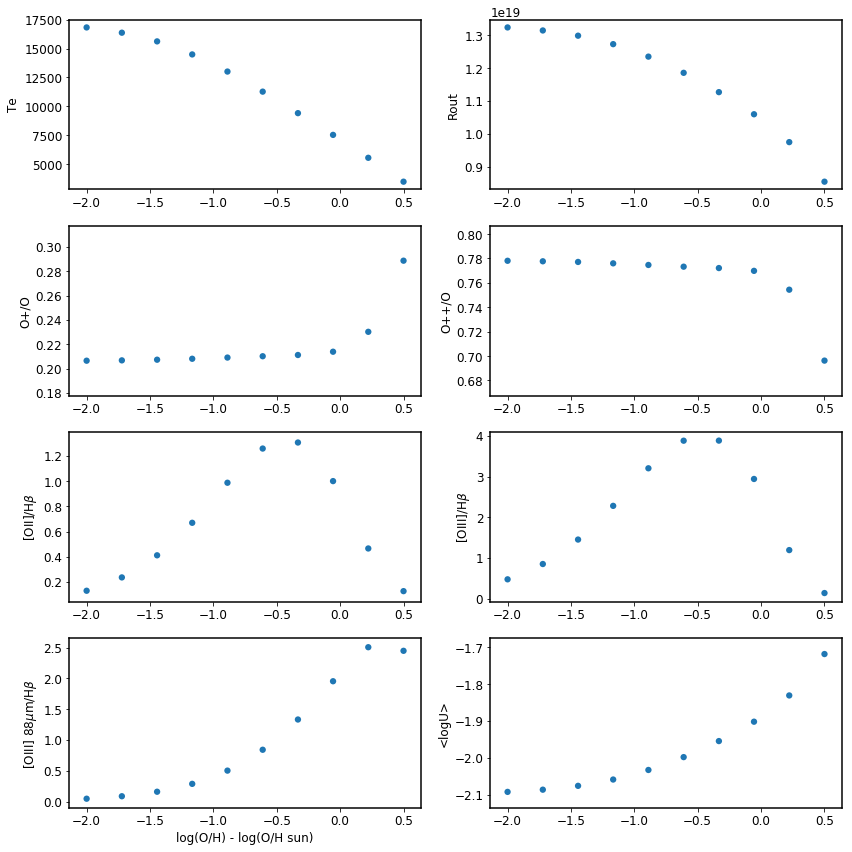

In [40]:
f, axes = plt.subplots(4, 2, figsize=(12,12))
msize = 40
axes[0, 0].scatter(ab_O, [M.T0 for M in Ms], edgecolor='none', s=msize)
axes[0, 0].set_ylabel('Te')
axes[0, 1].scatter(ab_O, [M.r_out for M in Ms], edgecolor='none', s=msize)
axes[0, 1].set_ylabel('Rout')
axes[1, 0].scatter(ab_O, [M.get_ab_ion_vol_ne('O', 1) for M in Ms], 
                   edgecolor='none', s=msize)
axes[1, 0].set_ylabel('O+/O')
axes[1, 1].scatter(ab_O, [M.get_ab_ion_vol_ne('O', 2) for M in Ms], 
                   edgecolor='none', s=msize)
axes[1, 1].set_ylabel('O++/O')
axes[2, 0].scatter(ab_O, [M.get_emis_vol('BLND_372700A')/M.get_emis_vol('H__1_486136A') 
                          for M in Ms], edgecolor='none', s=msize)
axes[2, 0].set_ylabel(r'[OII]/H$\beta$')
axes[2, 1].scatter(ab_O, [M.get_emis_vol('O__3_500684A')/M.get_emis_vol('H__1_486136A') 
                          for M in Ms], edgecolor='none', s=msize)
axes[2, 1].set_ylabel(r'[OIII]/H$\beta$')
axes[3, 0].scatter(ab_O, [M.get_emis_vol('O__3_883300M')/M.get_emis_vol('H__1_486136A') 
                          for M in Ms], edgecolor='none', s=msize)
axes[3, 0].set_ylabel(r'[OIII] 88$\mu$m/H$\beta$')
axes[3, 1].scatter(ab_O, [M.log_U_mean
                          for M in Ms], edgecolor='none', s=msize)
axes[3, 1].set_ylabel('<logU>')
axes[3, 0].set_xlabel('log(O/H) - log(O/H sun)')
f.tight_layout()

### Do the same, adding dust with Orion-type grains, with dust-to-gas ratio proportional to metallicity

In [41]:
generic_name = 'M6_11'

In [42]:
for delta_O in np.linspace(-2, 0.5, 10):
    name = '{}_{:.2f}'.format(generic_name, delta_O)
    make_mod2(name, delta_O, grains=True)

In [43]:
pc.run_cloudy(dir_=models_dir, n_proc=8, use_make=True, model_name=generic_name)

In [44]:
Ms2 = pc.load_models(model_name='{}/{}'.format(models_dir, generic_name))

In [45]:
ab_O_sol = abund_Asplund_2009['O']
msize=40
def plot_res(Ms, axes, color=None):
    if color is None:
        color = 'blue'
    ab_O = [M.abund['O'] - ab_O_sol for M in Ms]
    axes[0, 0].scatter(ab_O, [M.T0 for M in Ms], edgecolor='none', 
                       color=color, s=msize)
    axes[0, 1].scatter(ab_O, [M.r_out for M in Ms], edgecolor='none', 
                       color=color, s=msize)
    axes[1, 0].scatter(ab_O, [M.get_ab_ion_vol_ne('O', 1) for M in Ms],
                       color=color, edgecolor='none', s=msize)
    axes[1, 1].scatter(ab_O, [M.get_ab_ion_vol_ne('O', 2) for M in Ms], 
                       edgecolor='none', color=color, s=msize)
    axes[2, 0].scatter(ab_O, [M.get_emis_vol('BLND_372700A')/M.get_emis_vol('H__1_486136A') 
                              for M in Ms], edgecolor='none', color=color, s=msize)
    axes[2, 1].scatter(ab_O, [M.get_emis_vol('O__3_500684A')/M.get_emis_vol('H__1_486136A') 
                              for M in Ms], edgecolor='none', color=color, s=msize)
    axes[3, 0].scatter(ab_O, [M.get_emis_vol('O__3_883300M')/M.get_emis_vol('H__1_486136A') 
                              for M in Ms], edgecolor='none', color=color, s=msize)
    axes[3, 1].scatter(ab_O, [M.log_U_mean
                              for M in Ms], edgecolor='none', color=color, s=msize)
    axes[4, 0].scatter(ab_O, [M.get_emis_vol('H__1_486136A')
                              for M in Ms], edgecolor='none', color=color, s=msize)
    axes[0,0].set_ylabel('Te')
    axes[0,1].set_ylabel('Rout')
    axes[1,0].set_ylabel('O+/O')
    axes[1,1].set_ylabel('O++/O')
    axes[2,0].set_ylabel(r'[OII]3727A/H$\beta$')
    axes[2,1].set_ylabel(r'[OIII]5007A/H$\beta$')
    axes[3,0].set_ylabel(r'[OIII]88$\mu$m/H$\beta$')
    axes[3,1].set_ylabel('<logU>')
    axes[4,0].set_ylabel(r'H$\beta$')
    axes[4,0].set_xlabel('log(O/H) - log(O/H sun)')
    f=plt.gcf()
    f.tight_layout()

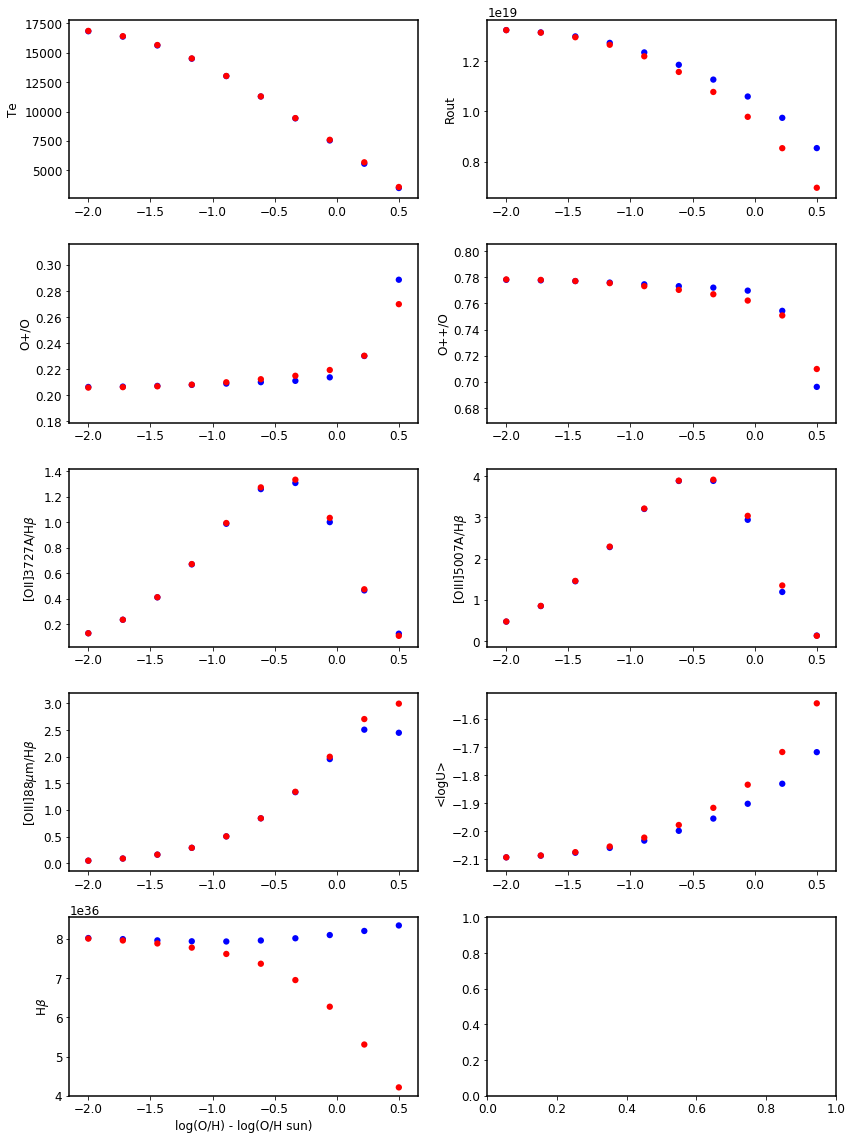

In [46]:
f, axes = plt.subplots(5, 2, figsize=(12,16))
plot_res(Ms, axes)
plot_res(Ms2, axes, color='red')

### ??? Comment on the results

### Do the same, now depleting the gas abundances according to the dust content.

In [47]:
generic_name = 'M6_12'

In [48]:
for delta_O in np.linspace(-2, 0.5, 10):
    name = '{}_{:.2f}'.format(generic_name, delta_O)
    make_mod2(name, delta_O, grains=True, depletion=True)

In [49]:
pc.run_cloudy(dir_=models_dir, n_proc=8, use_make=True, model_name=generic_name)

In [50]:
Ms3 = pc.load_models(model_name='{}/{}'.format(models_dir, generic_name))

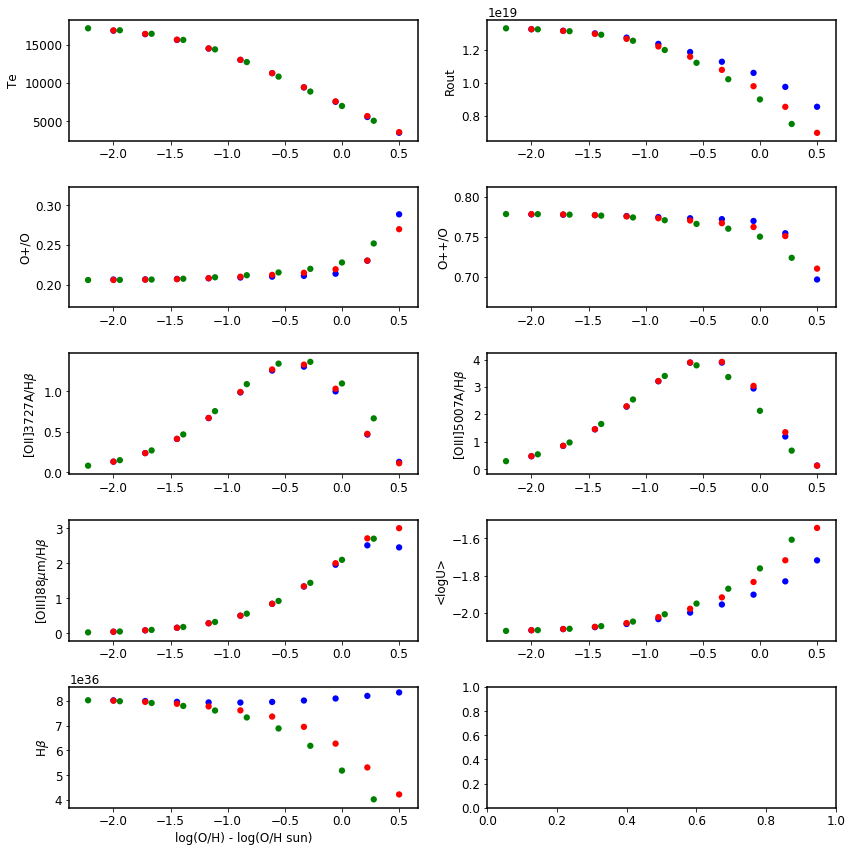

In [51]:
f, axes = plt.subplots(5, 2, figsize=(12,12))
plot_res(Ms, axes)
plot_res(Ms2, axes, color='red')
plot_res(Ms3, axes, color='green')
f.tight_layout()

### ??? Comment on the results

In [1]:
# the following is to have the nice style in the Notebook.
# Don't remove this.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()